In [1]:
from data_loader import CORE50
import copy
import os
import json
from models.vit import MyViT
from utils import *
import configparser
import argparse
from pprint import pprint
from torch.utils.tensorboard import SummaryWriter

In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
dataset = CORE50(root='/home/adequino/work/ar1-pytorch/core50', scenario="nicv2_79")
preproc = preprocess_imgs

Loading paths...
Loading LUP...
Loading labels...


In [4]:
test_x, test_y = dataset.get_test_set()

In [5]:
model = MyViT(pretrained=True)
model

Resized positional embeddings from torch.Size([1, 577, 768]) to torch.Size([1, 65, 768])
Loaded pretrained weights.


MyViT(
  (start_features): Sequential(
    (0): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (lat_features): Sequential(
    (0): PositionalEmbedding1D()
    (1): Block(
      (attn): MultiHeadedSelfAttention(
        (proj_q): Linear(in_features=768, out_features=768, bias=True)
        (proj_k): Linear(in_features=768, out_features=768, bias=True)
        (proj_v): Linear(in_features=768, out_features=768, bias=True)
        (drop): Dropout(p=0.1, inplace=False)
      )
      (proj): Linear(in_features=768, out_features=768, bias=True)
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (pwff): PositionWiseFeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
      )
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (drop): Dropout(p=0.1, inplace=False)
    )
    (2): Block(
      (attn): MultiHeadedSelfAttention(
        (pro

In [6]:
model.load_state_dict(torch.load("state_dict_model_clonly.pt"))

<All keys matched successfully>

In [7]:
model.eval()
criterion = torch.nn.CrossEntropyLoss()
mb_size = 10

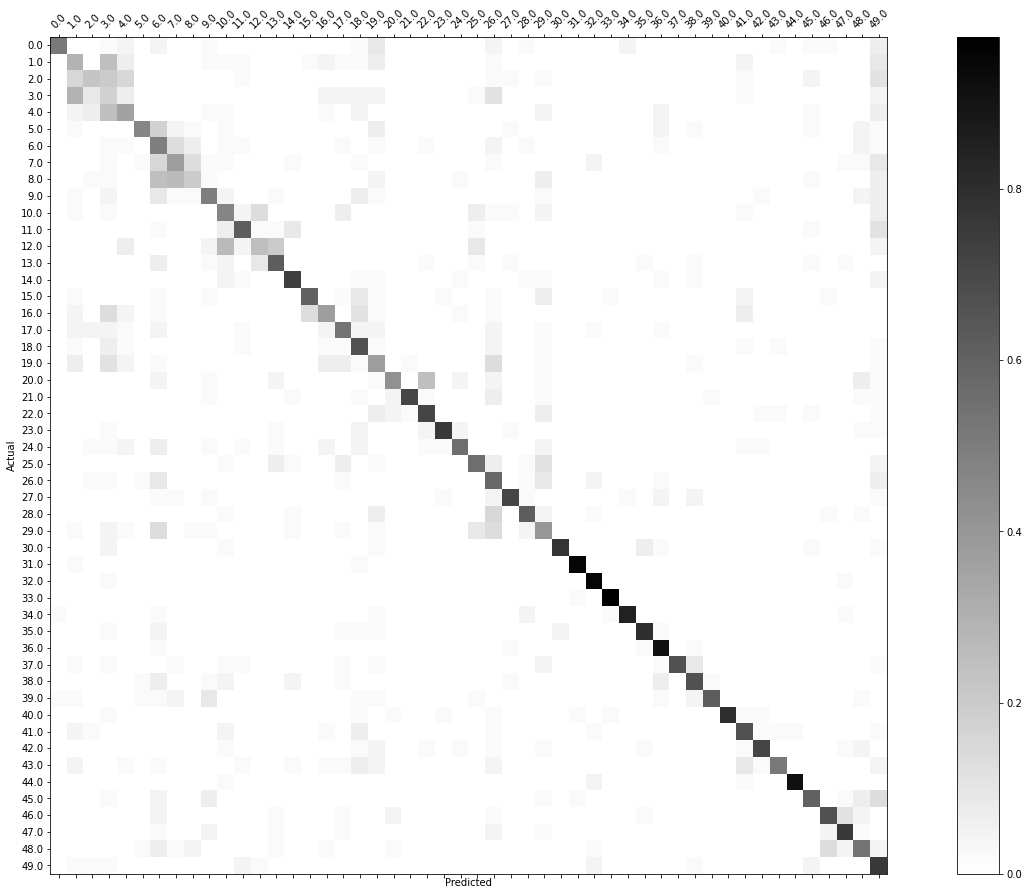

In [8]:
ave_loss, acc, accs = confusion_matrix(
        model, criterion, mb_size, test_x, test_y, preproc=preproc
    )

In [9]:
print("---------------------------------")
print("Accuracy: ", acc)
print("---------------------------------")

---------------------------------
Accuracy:  0.5984882169853268
---------------------------------
